<a href="https://colab.research.google.com/github/mfuga2/fuga-s-macro-project-/blob/main/quant_macro2025_updating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [ ]:
# utility function

def util(cons, gamma):
    return max(cons, 1e-4)**(1.0-gamma)/(1.0-gamma)

In [ ]:
# setting parameters

gamma = 2.0 # relative risk aversion
beta = 0.985**30 # time discount factor
r = 1.025**30 - 1.0 # interest rate

In [ ]:
# making grids

a_l = 0.025
a_u = 1.0
NA = 40
a = np.linspace(a_l, a_u, NA) # asset grids

w_l = 0.1
w_u = 1.0
NW = 10
w = np.linspace(w_l, w_u, NW) # wage grids

In [ ]:
# 2-period model: grid search

iaplus = np.zeros(NW, dtype=int) # indices (integers) of optimal assets for each w
aplus = np.zeros(NW) # optimal assets for each w

for iw in range(NW): # solve for each wage grid

    reward = np.zeros(NA) # setting reward array for each candidate asset

    for ia in range(NA): # calculate utility with the candidate assets
        reward[ia] = util(w[iw] - a[ia], gamma) + beta*util((1.0+r)*a[ia], gamma)

    iaplus[iw] = np.argmax(reward)
    aplus[iw] = a[iaplus[iw]]

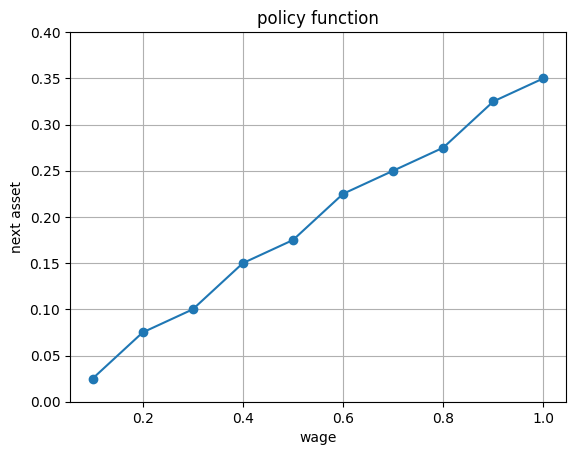

In [ ]:
# figure

plt.figure()
plt.plot(w, aplus, marker='o')
plt.title("policy function")
plt.xlabel("wage")
plt.ylabel("next asset")
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

In [ ]:
# 2-period model: optimization routine

aplus = np.zeros(NW) # optimal assets for each w

for iw in range(NW): # solve for each wage grid

    def negative_value_func(x): # max value = min negative value, x = assets
        return - util(w[iw] - x, gamma) - beta*util((1.0+r)*x, gamma)

    result = minimize_scalar(negative_value_func, bounds=(a_l, w[iw])) # minimization

    aplus[iw] = result.x # optimizer

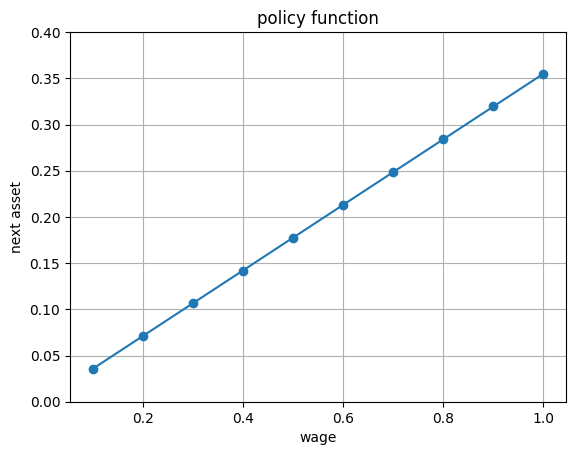

In [ ]:
# figure

plt.figure()
plt.plot(w, aplus, marker='o')
plt.title("policy function")
plt.xlabel("wage")
plt.ylabel("next asset")
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

In [ ]:
# 2-period model: value function iteration

v_2 = np.zeros(NA)

for ia in range(NA):
    v_2[ia] = util((1.0+r)*a[ia], gamma)

iaplus = np.zeros(NW, dtype=int) # indices (integers) of optimal assets for each w
aplus = np.zeros(NW) # optimal assets for each w

for iw in range(NW): # solve for each wage grid

    reward = np.zeros(NA) # setting reward array for each candidate asset

    for ia in range(NA): # calculate utility with the candidate assets
        reward[ia] = util(w[iw] - a[ia], gamma) + beta*v_2[ia]

    iaplus[iw] = np.argmax(reward)
    aplus[iw] = a[iaplus[iw]]

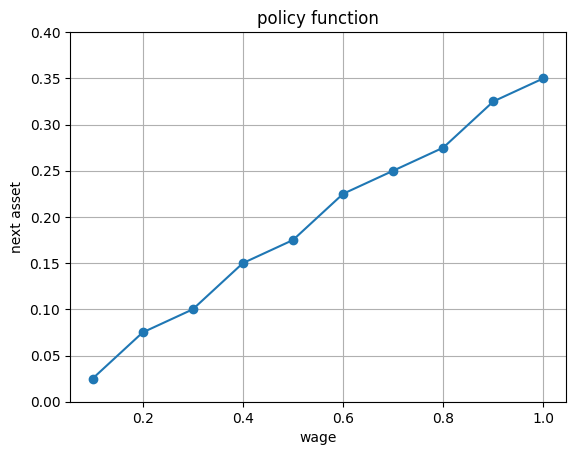

In [ ]:
# figure

plt.figure()
plt.plot(w, aplus, marker='o')
plt.title("policy function")
plt.xlabel("wage")
plt.ylabel("next asset")
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

In [ ]:
# linear interpolation
def linint(a_plus, a_l, a_u, NA):
    # create a grid of values between a_l and a_u
    a = np.linspace(a_l, a_u, NA)

    # find the index of the nearest grid point to a_plus
    idx = np.argmin(np.abs(a - a_plus))

    # determine the left and right indices and the weighting factor
    # for the linear interpolation
    if a_plus <= a_l:
        # if a_plus is less than or equal to the minimum value of a,
        # set the left index to 0
        ial = 0
    elif a_plus >= a_u:
        # if a_plus is greater than or equal to the maximum value of a,
        # set the left index to the second-to-last index
        ial = NA - 2
    else:
        # otherwise, set the left index to the index of the nearest
        # grid point, and set the right index to the next index
        # in the grid
        if a_plus - a[idx] > 0:
            ial = idx
        else:
            ial = idx - 1
    iar = ial + 1

    # calculate the weighting factor for the linear interpolation
    varphi = (a[iar] - a_plus) / (a[iar] - a[ial])


    return ial, iar, varphi

In [ ]:
# optimization

v_2 = np.zeros(NA)
v_2p = np.zeros(NA)

for ia in range(NA):
    # v_2[ia] = util((1.0+r)*a[ia], gamma)
    v_2p[ia] = (1.0+r)*a[ia]

aplus = np.zeros(NW) # optimal assets for each w

for iw in range(NW): # solve for each wage grid

    def negative_value_func(x): # max value = min negative value, x = assets
        ial, iar, varphi = linint(x, a_l, a_u, NA)
        V_help = varphi*v_2p[ial] + (1.0-varphi)*v_2p[iar]
        V_help = V_help**(1.0-gamma)/(1.0-gamma)
        return - util(w[iw] - x, gamma) - beta*V_help

    result = minimize_scalar(negative_value_func, bounds=(a_l, w[iw])) # minimization

    aplus[iw] = result.x # optimizer

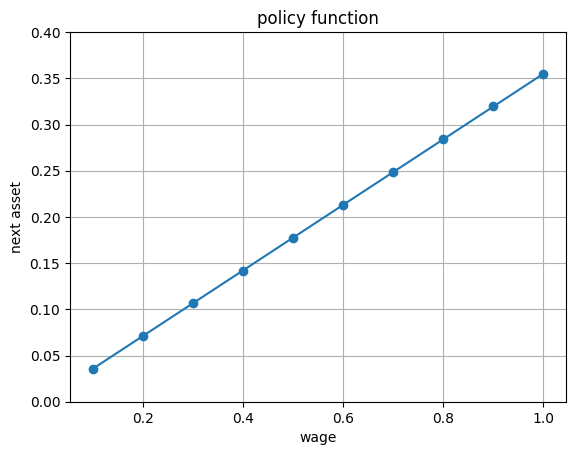

In [ ]:
# figure

plt.figure()
plt.plot(w, aplus, marker='o')
plt.title("policy function")
plt.xlabel("wage")
plt.ylabel("next asset")
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

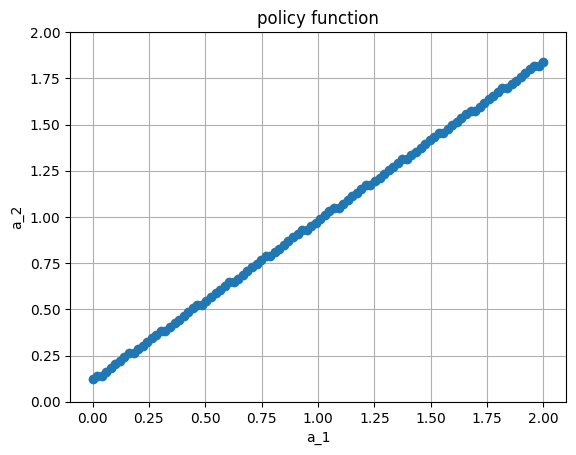

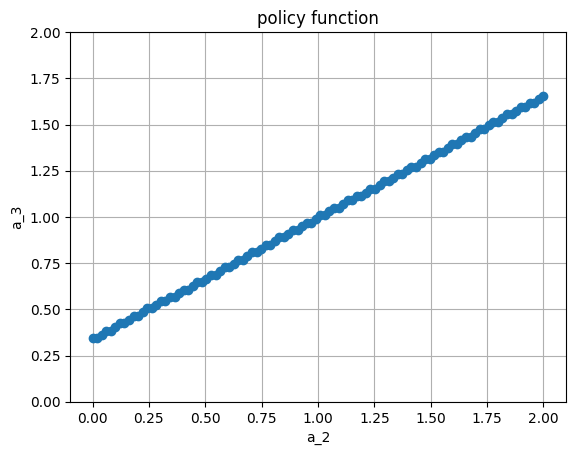

In [ ]:
# 3-period model

# parameters
gamma = 2.0
beta = 0.985**20
r = 1.025**20-1.0
y = np.array([1.0, 1.2, 0.4])
JJ = 3

# grids
a_l = 0.0
a_u = 2.0
NA = 100
a = np.linspace(a_l, a_u, NA)

# initialization
v = np.zeros((JJ, NA))
iaplus = np.zeros((JJ, NA), dtype=int)
aplus = np.zeros((JJ, NA))

# backward induction

# period 3
for ia in range(NA):
    v[2, ia] = util(y[2] + (1.0+r)*a[ia], gamma)

# period 2
for ia in range(NA):
    reward = np.zeros(NA)
    for iap in range(NA):
        reward[iap] = util(y[1] + (1.0+r)*a[ia] - a[iap], gamma) + beta*v[2, iap]
    iaplus[1, ia] = np.argmax(reward)
    aplus[1, ia] = a[iaplus[1, ia]]
    v[1, ia] = reward[iaplus[1, ia]]

# period 1
for ia in range(NA):
    reward = np.zeros(NA)
    for iap in range(NA):
        reward[iap] = util(y[0] + (1.0+r)*a[ia] - a[iap], gamma) + beta*v[1, iap]
    iaplus[0, ia] = np.argmax(reward)
    aplus[0, ia] = a[iaplus[0, ia]]
    v[0, ia] = reward[iaplus[0, ia]]

plt.figure()
plt.plot(a, aplus[0, :], marker='o')
plt.title("policy function")
plt.xlabel("a_1")
plt.ylabel("a_2")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.show()

plt.figure()
plt.plot(a, aplus[1, :], marker='o')
plt.title("policy function")
plt.xlabel("a_2")
plt.ylabel("a_3")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.show()

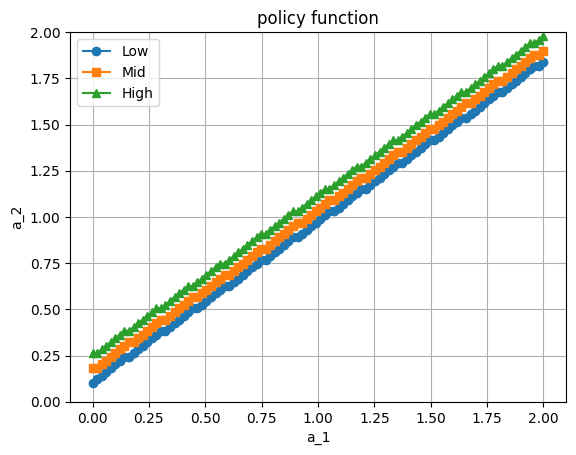

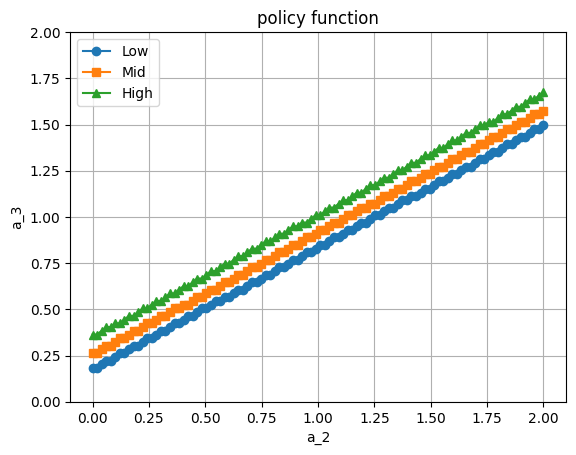

In [ ]:
# 3-period model with income risk

# parameters
gamma = 2.0
beta = 0.985**20
r = 1.025**20-1.0
y = np.array([1.0, 1.2, 0.4])
JJ = 3
l = np.array([0.8027, 1.0, 1.2457])
NL = 3
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1361],
    [0.0021, 0.2528, 0.7451]
])
mu_1 = np.array([1.0/NL, 1.0/NL, 1.0/NL])
mu_2 = np.zeros(NL)

for il in range(NL):
    for ilp in range(NL):
        mu_2[ilp] += prob[il, ilp]*mu_1[il]


# grids
a_l = 0.0
a_u = 2.0
NA = 100
a = np.linspace(a_l, a_u, NA)

# initialization
v = np.zeros((JJ, NA, NL))
iaplus = np.zeros((JJ, NA, NL), dtype=int)
aplus = np.zeros((JJ, NA, NL))

# backward induction

# period 3
for ia in range(NA):
    v[2, ia, :] = util(y[2] + (1.0+r)*a[ia], gamma)


# period 2
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):
            reward[iap] = util(l[il] + (1.0+r)*a[ia] - a[iap], gamma) + beta*v[2, iap, 0]
        iaplus[1, ia, il] = np.argmax(reward)
        aplus[1, ia, il] = a[iaplus[1, ia, il]]
        v[1, ia, il] = reward[iaplus[1, ia, il]]

# period 1
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):

            EV = 0.0
            for ilp in range(NL):
                EV += prob[il, ilp]*v[1, iap, ilp]

            reward[iap] = util(l[il] + (1.0+r)*a[ia] - a[iap], gamma) + beta*EV

        iaplus[0, ia, il] = np.argmax(reward)
        aplus[0, ia, il] = a[iaplus[0, ia, il]]
        v[0, ia, il] = reward[iaplus[0, ia, il]]

plt.figure()
plt.plot(a, aplus[0, :, 0], marker='o', label='Low')
plt.plot(a, aplus[0, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[0, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_1")
plt.ylabel("a_2")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(a, aplus[1, :, 0], marker='o', label='Low')
plt.plot(a, aplus[1, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[1, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_2")
plt.ylabel("a_3")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(mu_1)
print(mu_2)

[0.33333333 0.33333333 0.33333333]
[0.2944     0.41123333 0.29443333]


In [ ]:
# J-period model with income risk

# parameters
gamma = 2.0
beta = 0.985
r = 1.025-1.0
JJ = 46
l = np.array([0.8027, 1.0, 1.2457])
NL = 3
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1361],
    [0.0021, 0.2528, 0.7451]
])

# grids
a_l = 0.0
a_u = 6.0
NA = 100
a = np.linspace(a_l, a_u, NA)

# initialization
v = np.zeros((JJ, NA, NL))
iaplus = np.zeros((JJ, NA, NL), dtype=int)
aplus = np.zeros((JJ, NA, NL))
c = np.zeros((JJ, NA, NL))

# backward induction

# period JJ
for ia in range(NA):
    for il in range(NL):
        v[JJ-1, ia, il] = util(l[il] + (1.0+r)*a[ia], gamma)
        aplus[JJ-1, ia, il] = 0.0
        c[JJ-1, ia, il] = l[il] + (1.0+r)*a[ia]

# backward induction from JJ-1 to 1
for ij in range(JJ-2, -1, -1):
    for il in range(NL):
        for ia in range(NA):
            reward = np.zeros(NA)
            for iap in range(NA):

                EV = 0.0
                for ilp in range(NL):
                    EV += prob[il, ilp]*v[ij+1, iap, ilp]

                reward[iap] = util(l[il] + (1.0+r)*a[ia] - a[iap], gamma) + beta*EV

            iaplus[ij, ia, il] = np.argmax(reward)
            aplus[ij, ia, il] = a[iaplus[ij, ia, il]]
            c[ij, ia, il] = l[il] + (1.0+r)*a[ia] - aplus[ij, ia, il]
            v[ij, ia, il] = reward[iaplus[ij, ia, il]]

mu = np.zeros((JJ, NA, NL))
mu[0, 0, :] = 1.0/NL
for ij in range(JJ-1):
    for il in range(NL):
        for ia in range(NA):
            iap = iaplus[ij, ia, il]
            for ilp in range(NL):
                mu[ij+1, iap, ilp] += prob[il, ilp]*mu[ij, ia, il]




# plt.figure()
# plt.plot(a, aplus[0, :, 0], marker='o', label='Low')
# plt.plot(a, aplus[0, :, 1], marker='s', label='Mid')
# plt.plot(a, aplus[0, :, 2], marker='^', label='High')
# plt.title("assets at age 20")
# plt.xlabel("a")
# plt.ylabel("aprime")
# plt.ylim(a_l, a_u)
# plt.grid(True)
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(a, aplus[20, :, 0], marker='o', label='Low')
# plt.plot(a, aplus[20, :, 1], marker='s', label='Mid')
# plt.plot(a, aplus[20, :, 2], marker='^', label='High')
# plt.title("assets at age 40")
# plt.xlabel("a")
# plt.ylabel("aprime")
# plt.ylim(a_l, a_u)
# plt.grid(True)
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(a, aplus[40, :, 0], marker='o', label='Low')
# plt.plot(a, aplus[40, :, 1], marker='s', label='Mid')
# plt.plot(a, aplus[40, :, 2], marker='^', label='High')
# plt.title("assets at age 60")
# plt.xlabel("a")
# plt.ylabel("aprime")
# plt.ylim(a_l, a_u)
# plt.grid(True)
# plt.legend()
# plt.show()

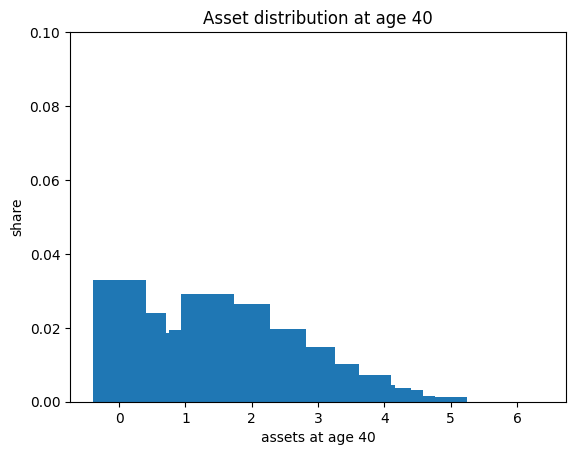

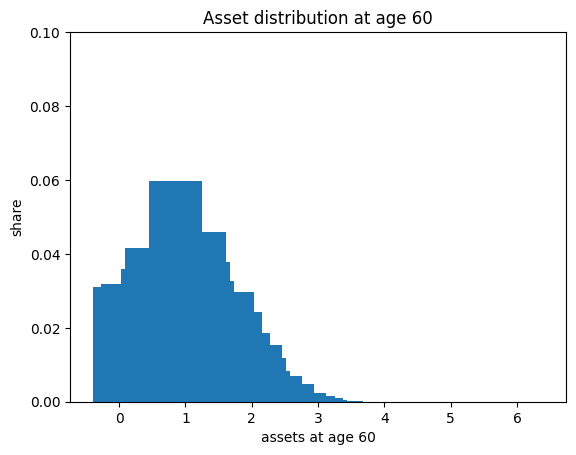

In [ ]:
asset_dist_40=np.sum(mu[20, :, :], axis=1)

plt.figure()
plt.bar(a, asset_dist_40)
plt.ylim(0, 0.1)
plt.xlabel('assets at age 40')
plt.ylabel('share')
plt.title('Asset distribution at age 40')
plt.show()

asset_dist_60=np.sum(mu[40, :, :], axis=1)

plt.figure()
plt.bar(a, asset_dist_60)
plt.ylim(0, 0.1)
plt.xlabel('assets at age 60')
plt.ylabel('share')
plt.title('Asset distribution at age 60')
plt.show()

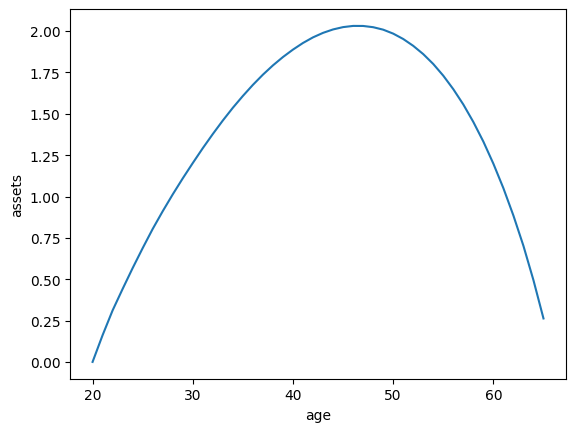

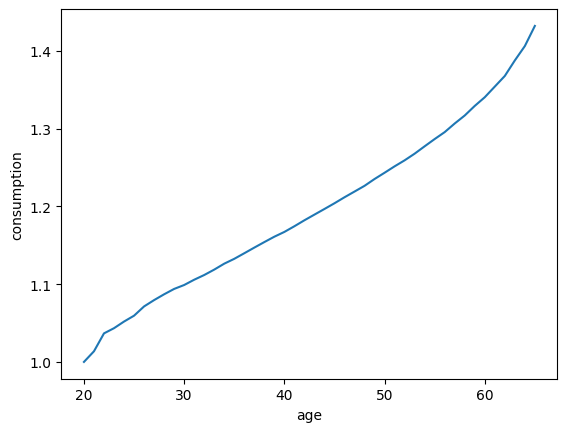

In [ ]:
asset_age = np.zeros(JJ)
cons_age = np.zeros(JJ)

for ij in range(JJ):
    for ia in range(NA):
        for il in range(NL):
            asset_age[ij] += a[ia]*mu[ij, ia, il]
            cons_age[ij] += c[ij, ia, il]*mu[ij, ia, il]

plt.figure()
plt.plot(np.arange(20, JJ+20), asset_age/cons_age[0])
plt.xlabel('age')
plt.ylabel('assets')
plt.show()

plt.figure()
plt.plot(np.arange(20, JJ+20), cons_age/cons_age[0])
plt.xlabel('age')
plt.ylabel('consumption')
plt.show()

In [ ]:
# J-period model with income risk

# parameters
gamma = 2.0
beta = 0.985
r = 1.025-1.0
JJ = 66
JR = 46
l = np.array([0.8027, 1.0, 1.2457])
NL = 3
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1361],
    [0.0021, 0.2528, 0.7451]
])

# grids
a_l = 0.0
a_u = 25.0
NA = 100
a = np.linspace(a_l, a_u, NA)

# initialization
v = np.zeros((JJ, NA, NL))
iaplus = np.zeros((JJ, NA, NL), dtype=int)
aplus = np.zeros((JJ, NA, NL))
c = np.zeros((JJ, NA, NL))

# backward induction

# period JJ
for ia in range(NA):
    for il in range(NL):
        v[JJ-1, ia, il] = util((1.0+r)*a[ia], gamma)
        aplus[JJ-1, ia, il] = 0.0
        c[JJ-1, ia, il] = (1.0+r)*a[ia]

# backward induction from JJ-1 to 1
for ij in range(JJ-2, -1, -1):
    for il in range(NL):
        for ia in range(NA):

            if ij < JR-1:
                inc = l[il] + (1.0+r)*a[ia]
            else:
                inc = (1.0+r)*a[ia]


            reward = np.zeros(NA)
            for iap in range(NA):

                EV = 0.0
                for ilp in range(NL):
                    EV += prob[il, ilp]*v[ij+1, iap, ilp]

                reward[iap] = util(inc - a[iap], gamma) + beta*EV

            iaplus[ij, ia, il] = np.argmax(reward)
            aplus[ij, ia, il] = a[iaplus[ij, ia, il]]
            c[ij, ia, il] = inc - aplus[ij, ia, il]
            v[ij, ia, il] = reward[iaplus[ij, ia, il]]

mu = np.zeros((JJ, NA, NL))
mu[0, 0, :] = 1.0/NL
for ij in range(JJ-1):
    for il in range(NL):
        for ia in range(NA):
            iap = iaplus[ij, ia, il]
            for ilp in range(NL):
                mu[ij+1, iap, ilp] += prob[il, ilp]*mu[ij, ia, il]



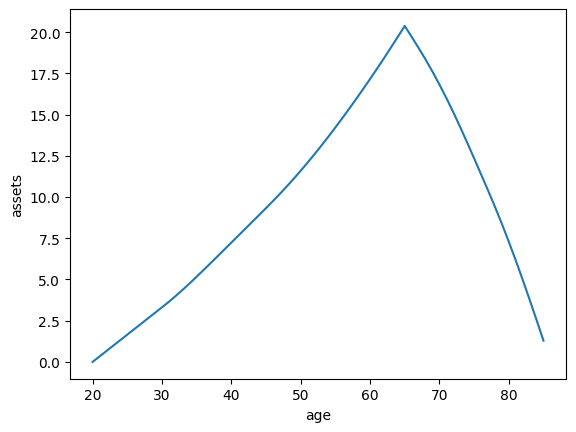

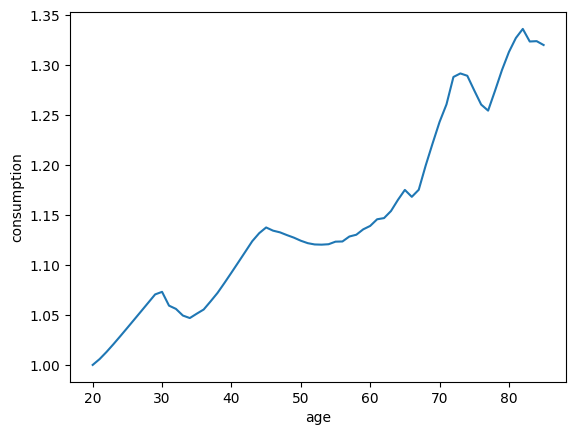

In [ ]:
asset_age = np.zeros(JJ)
cons_age = np.zeros(JJ)

for ij in range(JJ):
    for ia in range(NA):
        for il in range(NL):
            asset_age[ij] += a[ia]*mu[ij, ia, il]
            cons_age[ij] += c[ij, ia, il]*mu[ij, ia, il]

plt.figure()
plt.plot(np.arange(20, JJ+20), asset_age/cons_age[0])
plt.xlabel('age')
plt.ylabel('assets')
plt.show()

plt.figure()
plt.plot(np.arange(20, JJ+20), cons_age/cons_age[0])
plt.xlabel('age')
plt.ylabel('consumption')
plt.show()